In [1]:
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(train_x , train_y) , (test_x , test_y) = keras.datasets.mnist.load_data()

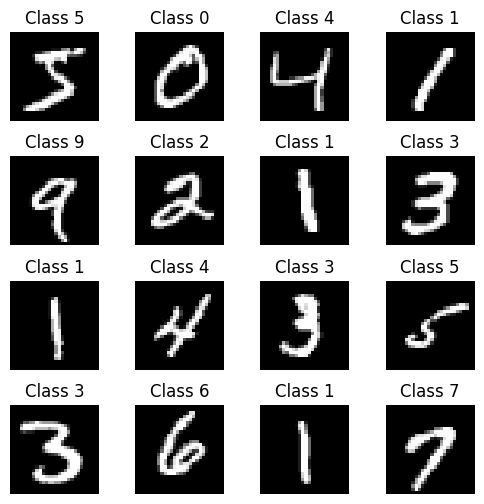

In [3]:
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(6,6))

for i, ax in enumerate(axes.flat):
    ax.imshow(train_x[i], cmap='gray', interpolation='none')
    ax.set_title("Class {}".format(train_y[i]))
    ax.axis('off')

plt.subplots_adjust(wspace=0.4, hspace=0.4)
plt.show()

In [4]:
train_x = train_x.astype("float32") / 255
test_x = test_x.astype("float32") / 255
train_x = np.expand_dims(train_x, -1)
test_x = np.expand_dims(test_x, -1)

In [5]:
train_x.shape , train_y.shape

((60000, 28, 28, 1), (60000,))

In [6]:
model = keras.Sequential([
        keras.Input(shape=[28,28 ,1]),
        keras.layers.Conv2D(32, kernel_size=(3, 3) , padding = 'same' , activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Conv2D(64, kernel_size=(3, 3) , padding = 'same' , activation = 'relu'),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(128 , activation = 'relu'),
        keras.layers.Dense(10, activation="softmax")])

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 28, 28, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 64)         0         
 2D)                                                             
                                                                 
 flatten (Flatten)           (None, 3136)              0         
                                                                 
 dense (Dense)               (None, 128)               4

In [8]:
model.compile(optimizer='adam' , loss = 'sparse_categorical_crossentropy' , metrics = ['accuracy'])

In [9]:
model.fit(train_x , train_y , batch_size = 64 , validation_split = 0.1 , epochs=10)

Epoch 1/10
844/844 [==============================] - 18s 21ms/step - loss: 0.1546 - accuracy: 0.9539 - val_loss: 0.0511 - val_accuracy: 0.9848
Epoch 2/10
844/844 [==============================] - 19s 23ms/step - loss: 0.0466 - accuracy: 0.9857 - val_loss: 0.0465 - val_accuracy: 0.9868
Epoch 3/10
844/844 [==============================] - 19s 23ms/step - loss: 0.0311 - accuracy: 0.9904 - val_loss: 0.0372 - val_accuracy: 0.9893
Epoch 4/10
844/844 [==============================] - 20s 23ms/step - loss: 0.0226 - accuracy: 0.9928 - val_loss: 0.0414 - val_accuracy: 0.9880
Epoch 5/10
844/844 [==============================] - 20s 23ms/step - loss: 0.0160 - accuracy: 0.9948 - val_loss: 0.0381 - val_accuracy: 0.9915
Epoch 6/10
844/844 [==============================] - 20s 23ms/step - loss: 0.0126 - accuracy: 0.9956 - val_loss: 0.0468 - val_accuracy: 0.9887
Epoch 7/10
844/844 [==============================] - 20s 23ms/step - loss: 0.0115 - accuracy: 0.9963 - val_loss: 0.0401 - val_accuracy:

In [10]:
score = model.evaluate(test_x, test_y, verbose=0)
print("Test loss:", score[0])
print("Test accuracy:", score[1])

Test loss: 0.03531290218234062
Test accuracy: 0.9904999732971191


In [11]:
model.save('mnist.h5')